# Axis Bank Stock Price-Forecast using AR-I-MA

## Import necessary libraries

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

## Stock Data Download

In [2]:
# Define the start and end dates for data download
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2024, 11, 26)
symbol = 'AXISBANK.NS'

In [3]:
# Download historical stock data using yfinance
stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[['Open', 'High', 'Low', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data.head()

Price,Open,High,Low,Close
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976


In [5]:
stk_data.tail()

Price,Open,High,Low,Close
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,
2024-11-18,1131.199951,1135.000000,1121.550049,1126.199951
2024-11-19,1130.000000,1139.000000,1122.050049,1133.949951
2024-11-21,1138.000000,1152.000000,1115.750000,1139.150024
2024-11-22,1136.650024,1147.900024,1127.550049,1142.400024
2024-11-25,1160.000000,1164.500000,1142.000000,1155.900024


## Data preprocessing

In [6]:
# Normalize the 'Close' column using MinMaxScaler
column = 'Close'
ms = MinMaxScaler()
data1 = ms.fit_transform(stk_data[[column]])  
print('len:', data1.shape)

len: (862, 1)


In [7]:
data1

array([[0.17289487],
       [0.16111312],
       [0.18084572],
       [0.16841343],
       [0.18149617],
       [0.17462953],
       [0.16075172],
       [0.17159379],
       [0.16320927],
       [0.16002892],
       [0.18120712],
       [0.1796169 ],
       [0.16342606],
       [0.16010118],
       [0.16479941],
       [0.16451027],
       [0.15439101],
       [0.16422122],
       [0.19631366],
       [0.19783162],
       [0.18272499],
       [0.17744848],
       [0.17477414],
       [0.18084572],
       [0.19486805],
       [0.19197684],
       [0.19855443],
       [0.18626675],
       [0.17607514],
       [0.18511019],
       [0.20990242],
       [0.20889048],
       [0.21481753],
       [0.2104807 ],
       [0.18742322],
       [0.1737622 ],
       [0.17520781],
       [0.18771236],
       [0.18901336],
       [0.15345141],
       [0.14073007],
       [0.13256235],
       [0.12049155],
       [0.13820026],
       [0.16342606],
       [0.18539933],
       [0.17889409],
       [0.166

In [8]:
# Split the data into training and test sets (80% training, 20% test)
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

X_train length: (690, 1)
X_test length: (172, 1)
y_train length: (690, 1)
y_test length: (172, 1)


In [9]:
X_train

array([[0.17289487],
       [0.16111312],
       [0.18084572],
       [0.16841343],
       [0.18149617],
       [0.17462953],
       [0.16075172],
       [0.17159379],
       [0.16320927],
       [0.16002892],
       [0.18120712],
       [0.1796169 ],
       [0.16342606],
       [0.16010118],
       [0.16479941],
       [0.16451027],
       [0.15439101],
       [0.16422122],
       [0.19631366],
       [0.19783162],
       [0.18272499],
       [0.17744848],
       [0.17477414],
       [0.18084572],
       [0.19486805],
       [0.19197684],
       [0.19855443],
       [0.18626675],
       [0.17607514],
       [0.18511019],
       [0.20990242],
       [0.20889048],
       [0.21481753],
       [0.2104807 ],
       [0.18742322],
       [0.1737622 ],
       [0.17520781],
       [0.18771236],
       [0.18901336],
       [0.15345141],
       [0.14073007],
       [0.13256235],
       [0.12049155],
       [0.13820026],
       [0.16342606],
       [0.18539933],
       [0.17889409],
       [0.166

In [10]:
y_test

array([[0.65753523],
       [0.62551496],
       [0.60838453],
       [0.62999631],
       [0.61474525],
       [0.59154315],
       [0.59277189],
       [0.58944709],
       [0.59992775],
       [0.61770864],
       [0.60954091],
       [0.61807004],
       [0.60954091],
       [0.632743  ],
       [0.63230925],
       [0.62674369],
       [0.65124687],
       [0.65695695],
       [0.66823277],
       [0.64748814],
       [0.62508121],
       [0.61633538],
       [0.57600286],
       [0.58337543],
       [0.61929877],
       [0.62190094],
       [0.632743  ],
       [0.72490057],
       [0.72967115],
       [0.77152145],
       [0.78113479],
       [0.75793269],
       [0.7458619 ],
       [0.74896999],
       [0.72591242],
       [0.72728586],
       [0.70849294],
       [0.71492583],
       [0.73212861],
       [0.71890126],
       [0.72641853],
       [0.74268163],
       [0.74564502],
       [0.74029634],
       [0.72345496],
       [0.78019511],
       [0.79284418],
       [0.811

In [11]:
import warnings
warnings.filterwarnings("ignore")

## ARIMA Model Tuning

In [12]:
# Test different ARIMA orders to identify the best performing one
orders = [(1, 1, 1), (1, 1, 2), (2, 3, 1), (2, 2, 2)]

# Loop through the different ARIMA model orders
for order in orders:
    model = ARIMA(data1, order=order)
    model_fit = model.fit()  # Fit the ARIMA model
    
    # Make predictions
    y_pred = model_fit.predict(0, len(data1)-1)
    
    # Evaluate the model using RMSE and MAPE
    rmse = mean_squared_error(data1, y_pred, squared=False)
    mape = mean_absolute_percentage_error(data1, y_pred)
    print(f"Order {order}: RMSE = {rmse}, MAPE = {mape}")

Order (1, 1, 1): RMSE = 0.021199121208817357, MAPE = 128797499958.72453
Order (1, 1, 2): RMSE = 0.021089728725114172, MAPE = 127206816193.47932
Order (2, 3, 1): RMSE = 0.025168000542265163, MAPE = 158288592930.2114
Order (2, 2, 2): RMSE = 0.021515797393769943, MAPE = 124248780216.24434


## Selecting Best ARIMA Model

In [13]:
best_order = (1, 1, 1)
model = ARIMA(data1, order=best_order)
model_fit = model.fit()

# Predict using the ARIMA model
y_pred = model_fit.predict(0, len(data1) - 1)

In [14]:
y_pred

array([0.00000000e+00, 1.72894870e-01, 1.61411077e-01, 1.80098770e-01,
       1.69365029e-01, 1.80354702e-01, 1.75785573e-01, 1.60073091e-01,
       1.71930201e-01, 1.63112138e-01, 1.60187415e-01, 1.80577935e-01,
       1.80201393e-01, 1.63291515e-01, 1.60295073e-01, 1.64522228e-01,
       1.64758235e-01, 1.54408315e-01, 1.63979712e-01, 1.95784881e-01,
       1.98257025e-01, 1.82702387e-01, 1.77589612e-01, 1.74712827e-01,
       1.80759376e-01, 1.94620546e-01, 1.92258845e-01, 1.98157557e-01,
       1.86895007e-01, 1.75762694e-01, 1.85174312e-01, 2.09276129e-01,
       2.09459013e-01, 2.14186176e-01, 2.11130145e-01, 1.87388366e-01,
       1.74106885e-01, 1.74874461e-01, 1.87714843e-01, 1.88981258e-01,
       1.54297639e-01, 1.40286065e-01, 1.33136842e-01, 1.20269143e-01,
       1.37986406e-01, 1.63031793e-01, 1.85236977e-01, 1.79185127e-01,
       1.66706384e-01, 1.87345456e-01, 1.96846810e-01, 1.95331109e-01,
       1.90809212e-01, 1.93890761e-01, 1.97468037e-01, 1.89651618e-01,
      

## Model Evaluation

In [15]:
# Calculate evaluation metrics for model performance
rmse = mean_squared_error(data1, y_pred, squared=False)
mape = mean_absolute_percentage_error(data1, y_pred)
r2 = r2_score(data1, y_pred)
print(f"Best Order ({best_order}):")
print(f"RMSE-Testset: {rmse}")
print(f"MAE-Testset: {mape}")
print(f"R^2-Testset: {r2}")
print('*************')

Best Order ((1, 1, 1)):
RMSE-Testset: 0.021199121208817357
MAE-Testset: 128797499958.72453
R^2-Testset: 0.9931091715352924
*************


## Visualization (Normalized Data)

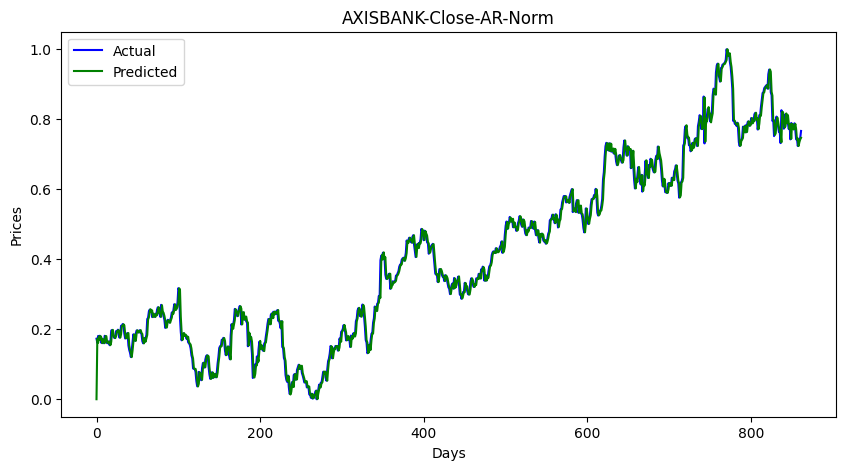

In [16]:
# Plot the actual vs predicted values for normalized data
plt.figure(figsize=(10, 5))
plt.plot(data1, color='blue', label="Actual")
plt.plot(y_pred, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Norm")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

## Inverse Transform and Visualization (Original Data)

In [17]:
# Inverse transform the normalized data to original scale for better interpretability
aTestNormTable = pd.DataFrame(data1, columns=[column])
actual_stock_price_test_ori = ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

In [18]:
aTestNormTable

,Close
0,0.172895
1,0.161113
2,0.180846
3,0.168413
4,0.181496
...,...
857,0.723744
858,0.734947
859,0.742465
860,0.747163


In [19]:
actual_stock_price_test_ori

array([[ 745.15002441],
       [ 737.        ],
       [ 750.65002441],
       [ 742.04998779],
       [ 751.09997559],
       [ 746.34997559],
       [ 736.75      ],
       [ 744.25      ],
       [ 738.45001221],
       [ 736.25      ],
       [ 750.90002441],
       [ 749.79998779],
       [ 738.59997559],
       [ 736.29998779],
       [ 739.54998779],
       [ 739.34997559],
       [ 732.34997559],
       [ 739.15002441],
       [ 761.34997559],
       [ 762.40002441],
       [ 751.95001221],
       [ 748.29998779],
       [ 746.45001221],
       [ 750.65002441],
       [ 760.34997559],
       [ 758.34997559],
       [ 762.90002441],
       [ 754.40002441],
       [ 747.34997559],
       [ 753.59997559],
       [ 770.75      ],
       [ 770.04998779],
       [ 774.15002441],
       [ 771.15002441],
       [ 755.20001221],
       [ 745.75      ],
       [ 746.75      ],
       [ 755.40002441],
       [ 756.29998779],
       [ 731.70001221],
       [ 722.90002441],
       [ 717.25 

In [20]:
actual_stock_price_test_oriA

,Close
0,745.150024
1,737.000000
2,750.650024
3,742.049988
4,751.099976
...,...
857,1126.199951
858,1133.949951
859,1139.150024
860,1142.400024


In [21]:
# Inverse transform the predicted values back to the original scale
pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

In [22]:
pTestNormTable

,Close
0,0.000000
1,0.172895
2,0.161411
3,0.180099
4,0.169365
...,...
857,0.745451
858,0.723577
859,0.734835
860,0.742389


In [23]:
predicted_stock_price_test_ori

array([[ 625.54998779],
       [ 745.15002441],
       [ 737.20611003],
       [ 750.13332301],
       [ 742.70825723],
       [ 750.31036382],
       [ 747.1496683 ],
       [ 736.28055811],
       [ 744.48271452],
       [ 738.38281939],
       [ 736.35964211],
       [ 750.46478559],
       [ 750.20431229],
       [ 738.50690299],
       [ 736.43411454],
       [ 739.35824881],
       [ 739.52150663],
       [ 732.36194883],
       [ 738.98296377],
       [ 760.98419128],
       [ 762.69429666],
       [ 751.93437526],
       [ 748.39761275],
       [ 746.4075965 ],
       [ 750.59029693],
       [ 760.17876207],
       [ 758.54505585],
       [ 762.62549025],
       [ 754.83462043],
       [ 747.13384185],
       [ 753.64432928],
       [ 770.31676264],
       [ 770.44327251],
       [ 773.71328782],
       [ 771.59927841],
       [ 755.17590128],
       [ 745.98843629],
       [ 746.51940679],
       [ 755.40174187],
       [ 756.27778437],
       [ 732.28538924],
       [ 722.592

In [24]:
predicted_stock_price_test_oriP

,Close
0,625.549988
1,745.150024
2,737.206110
3,750.133323
4,742.708257
...,...
857,1141.216062
858,1126.084269
859,1133.872336
860,1139.097942


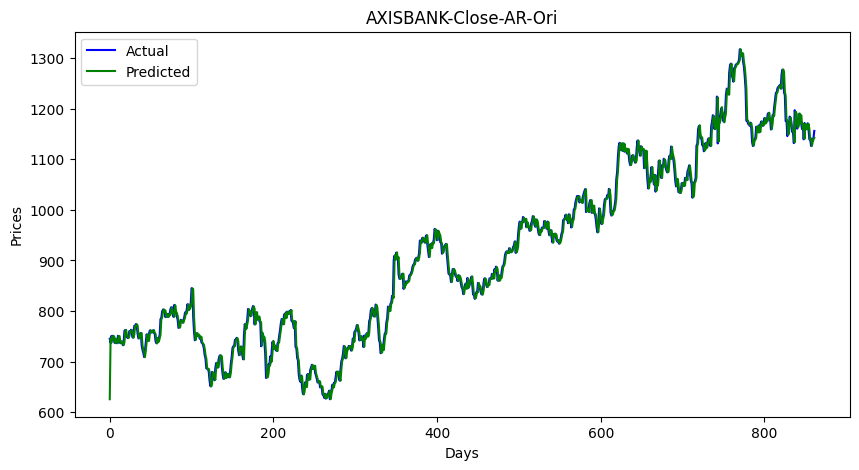

In [25]:
# Plot actual vs predicted values for original scale data
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Ori")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [26]:
# Calculate RMSE, MAPE, and R² for the original scale data
rmse_ori = mean_squared_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriP, squared=False)
mape_ori = mean_absolute_percentage_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)
r2_ori = r2_score(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)

print("RMSE-Testset (Original):", rmse_ori)
print("MAPE-Testset (Original):", mape_ori)
print("R²-Testset (Original):", r2_ori)

RMSE-Testset (Original): 14.664493390091087
MAPE-Testset (Original): 0.011478325098814229
R²-Testset (Original): 0.9931091715352924


## Forecasting Future Prices

In [27]:
# Use the model to forecast the next 3 days
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [28]:
forecast

array([0.76626669, 0.76663487, 0.76630586, 0.76659986])

In [29]:
fTestNormTable

,Closefore
0,0.766267
1,0.766635
2,0.766306
3,0.766600


In [30]:
forecast_stock_price_test_ori

array([[1155.61501909],
       [1155.86970334],
       [1155.64211438],
       [1155.84549067]])

In [31]:
forecast_stock_price_test_oriF

,Closefore
0,1155.615019
1,1155.869703
2,1155.642114
3,1155.845491
